## Cross validation for one single model for PM2.5 prediction
This notebook is used to generate a single centralised model for PM2.5 prediction in Beijing

In [10]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

import pm25_beijing

DATA_PATH = "data/pollution-data/"
FEATURES_TO_USE = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM", "wd", "month", "day", "hour"]
TIMESTEPS = 48 # How many steps the LSTM should take into account
NUM_REG_CLASSES = 3
K_FOLDS = 5
EPOCHS = 10
MODEL_PATH_PREFIX = "models/cross_val_models/"

In [2]:
# With this DataHandler the run function does not need to preprocess everything again
data = pm25_beijing.DataHandler(DATA_PATH, features_to_use=FEATURES_TO_USE, col_to_predict=["PM2.5"])
data.preprocess_data(minmax_features=FEATURES_TO_USE)
data.interpolate()
data.create_model_input(TIMESTEPS, save_data=True)
_, data_labels = data.create_classes(NUM_REG_CLASSES, features=["PM2.5"])

Recognized wd (wind direction) as feature. Create columns north, east, south and west automatically.
Creating multiple classes from wd (wind direction):


100%|██████████| 12/12 [00:29<00:00,  2.43s/it]


Aotizhongxin (1/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1232.71it/s]


Changping (2/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1229.71it/s]


Dingling (3/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1230.45it/s]


Dongsi (4/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1216.69it/s]


Guanyuan (5/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1234.75it/s]


Gucheng (6/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1234.01it/s]


Huairou (7/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1234.34it/s]


Nongzhanguan (8/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1231.47it/s]


Shunyi (9/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1235.08it/s]


Tiantan (10/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1225.79it/s]


Wanliu (11/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1234.74it/s]


Wanshouxigong (12/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1230.72it/s]


In [3]:
# The actual Cross Validation
input_data = data.model_input
# For (shuffling, if wanted) and removing specific datapoints from labels. During input creation, the TIMESTEPS
# first values of each station are removed, because each input takes TIMESTEPS values before (since it is an
# LSTM). These missing values must be removed from the labels as well (TIMESTEPS * number of stations). This is
# done inside the train_test_split, so using this function without actually splitting the data, removes the
# spare datapoints from labels. The actual train/test splitting happens in the cross_validation_train.
x, y, x_l, y_l= data.train_test_split(input_data, data_labels, TIMESTEPS, test_split=0, shuffle_data=False)
loss_history, models = pm25_beijing.cross_validation_train(x, x_l, K_FOLDS, TIMESTEPS, len(FEATURES_TO_USE)+3, NUM_REG_CLASSES,
                                                          save_model=True, save_model_path=MODEL_PATH_PREFIX, epochs=EPOCHS)

0it [00:00, ?it/s]2023-01-17 23:12:40.996883: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-17 23:12:40.996951: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-17 23:12:40.996974: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (svsram): /proc/driver/nvidia/version does not exist


-Epoch 1/10
1069/2627 [===========>..................] - ETA: 56s - loss: 0.8818 - accuracy: 0.5542

0it [00:44, ?it/s]


KeyboardInterrupt: 

In [5]:
# Load cross validation models to avoid the above training:
models = []
input_data = data.model_input
for i in range(K_FOLDS):
    name = f"{MODEL_PATH_PREFIX}ep{EPOCHS}_k{K_FOLDS}_{i+1}"
    models.append(keras.models.load_model(name))

In [7]:
# Predict values for all models from cross validation
f1_cross_val = []
predictions = []
true_labels = []
# This step is done for the same reason as for the training
x, y, x_l, y_l= data.train_test_split(input_data, data_labels, TIMESTEPS, test_split=0, shuffle_data=False)
for m in models:
    f1, true_y, pred_y = pm25_beijing.get_metrics(m, x, x_l, return_labels=True)
    f1_cross_val.append(f1)
    predictions.append(pred_y)
    true_labels.append(true_y)


3283/3283 [==============================] - 55s 17ms/step


In [22]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# Calculate metrics for cross validation models
precision = None
recall = None
acc = []
for i in range(len(models)):
    pred_y = predictions[i]
    true_y = true_labels[i]
    acc.append(accuracy_score(predictions[i], true_labels[i]))

    prec, rec, _, _ = precision_recall_fscore_support(true_y, pred_y,
                                                      average=None)

    if precision is None:
        precision = np.array(prec).reshape((1, 3))
        recall = np.array(rec).reshape((1, 3))
    else:
        precision = np.concatenate((precision, prec.reshape((1, 3))))
        recall = np.concatenate((recall, rec.reshape((1, 3))))

f1 = np.mean(f1_cross_val)
std = np.std(f1_cross_val)
accuracy = np.mean(acc)
std_acc = np.std(np.array(acc))
precision_cross_val = np.mean(precision, axis=0)
recall_cross_val = np.mean(recall, axis=0)
print("The mean over each model from cross validation")
print("              class 0     class 1     class 2")
print("Precision:   " + str(precision_cross_val))
print("Recall:      " + str(recall_cross_val))
# In this case F1 Score equals Accuracy
print(f"F1 Score (std deviation): {f1} ({std})")

The mean over each model from cross validation
              class 0     class 1     class 2
Precision:   [0.81485336 0.60914224 0.75971647]
Recall:      [0.79510043 0.61038181 0.76488556]
F1 Score (std deviation): 0.7244535831239053 (0.00490718667081355)


(0.0, 1.0)

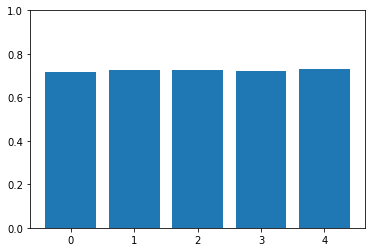

In [25]:
# Simple visulisation of the cross validation models
bars = np.arange(K_FOLDS)
fig, ax = plt.subplots()
ax.bar(bars, f1_cross_val)
ax.set_ylim(0, 1)